In [38]:
import numpy as np
import pandas as pd

train = pd.read_csv('csv/fashionmnist/fashion-mnist_train.csv')

# train 데이터를 x_train과 y_train으로 분리, 28*28으로 reshape
y_train = train['label']
x_train = train.drop(labels='label', axis=1)
x_train = x_train.values.reshape(-1, 28, 28) 
print(y_train[:20])

test = pd.read_csv('csv/fashionmnist/fashion-mnist_test.csv')

# test 데이터를 x_test와 y_test으로 분리, 28*28으로 reshape
y_test = test['label']
x_test = test.drop(labels='label', axis=1)
x_test = x_test.values.reshape(-1, 28, 28)

# # 그레이스케일을 RGB로 변환하는 법
# x_train_rgb = np.repeat(x_train, 3, axis=-1)  # 채널 차원을 3배로 복제
# x_test_rgb = np.repeat(x_test, 3, axis=-1)

# 단색 데이터만 있음을 알려줌
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

0     2
1     9
2     6
3     0
4     3
5     4
6     4
7     5
8     4
9     8
10    0
11    8
12    9
13    0
14    2
15    2
16    9
17    3
18    3
19    3
Name: label, dtype: int64
(60000, 28, 28, 1)


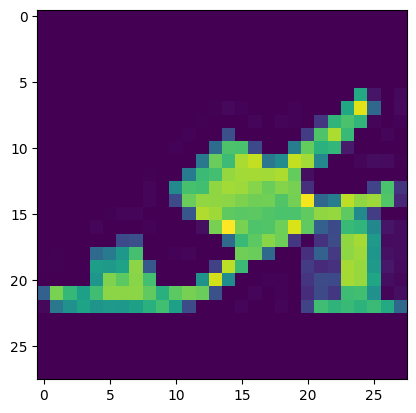

5


In [46]:
# 픽셀 변환 테스트기

import cv2
import numpy as np
import matplotlib.pyplot as plt

# x_train[0]

plt.imshow(x_train[50])
plt.show()

print(y_train[50])

In [8]:
from keras.layers import Conv2D, Input, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from keras.regularizers import l2
from keras.models import Sequential

model = Sequential()

img_shape = (28,28,1)

model.add(Input(shape=img_shape))

model.add(Conv2D(filters=6, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))

# 배치 정규화 포함
model.add(BatchNormalization())

model.add(Conv2D(filters=12, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(10, bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

history= model.fit(x_train, y_train,
                   batch_size=32, epochs=10,
                   validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.7478 - loss: 0.7191 - val_acc: 0.8536 - val_loss: 0.4035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8657 - loss: 0.3745 - val_acc: 0.8789 - val_loss: 0.3464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8766 - loss: 0.3446 - val_acc: 0.8776 - val_loss: 0.3380
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8865 - loss: 0.3177 - val_acc: 0.8848 - val_loss: 0.3238
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8905 - loss: 0.3045 - val_acc: 0.8868 - val_loss: 0.3150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8911 - loss: 0.3009 - val_acc: 0.8850 - val_loss: 0.3186
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8939 - loss: 0.2955 - val_acc: 0.8855 - val_loss: 0.3198
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.8977 - loss: 0.2866 - val_acc: 0.8900 - val_loss: 0.3110
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

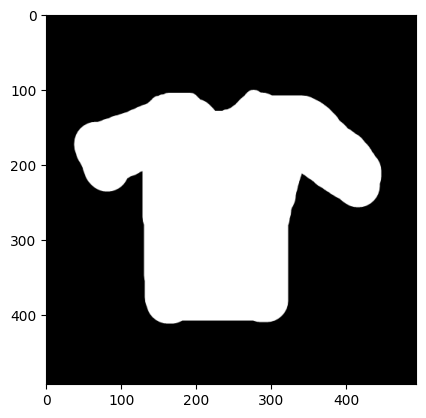

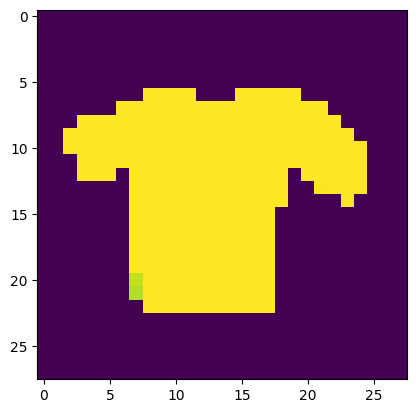

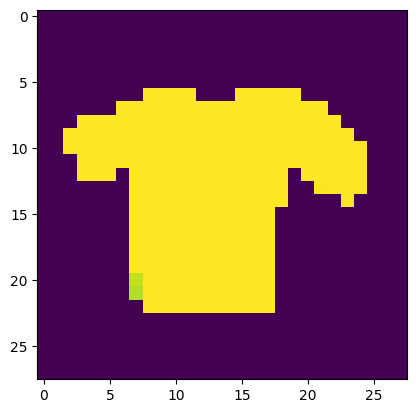

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.10620733 0.00433828 0.01276525 0.02675332 0.00323884 0.3134581
  0.11447924 0.06512456 0.32942277 0.02421222]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8


In [47]:
# 여기서 글자 이미지를 넣어서 어떤 숫자인지 맞춰보기

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/t-shirt.png')
plt.imshow(img)
plt.show()

img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img / 255.0

plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=2)
img = np.expand_dims(img, axis=0)

plt.imshow(img[0])
plt.show()

print(model.predict(img))

print(np.argmax(model.predict(img)))
